# Problem Set 2 (60 pts)

## Important information

Please submit the single Jupyter Notebook file, where only Python and Markdown/LaTeX are used. Any hand-written solutions inserted by photos or in any other way are prohibitive and will not be graded. If you will have any questions about using Markdown, ask them!

The works will be checked for plagiarism. The score will be divided by the number of similar works.

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Matrix Completion via Gradient Descent with Probabilistic Perspective (27 pts)



In this problem set, we will focus on the matrix completion problem, where we aim to infer the missing entries of a partially observed matrix. Matrix completion has applications in fields like computer vision, signal processing, and recommendation systems.

We intent to set up an objective function derived from probabilistic assumptions, evaluate gradients, and apply gradient descent for optimization. Additionally, we’ll explore practical aspects of implementation and validation.



In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

### **Part 1: Theoretical Formulation and Objective Properties (8 pts)**

#### **1.1 Probabilistic Framework for Matrix Completion **

One may interpret matrix completion from a probabilistic standpoint. Let $X \in \mathbb{R}^{N \times M}$ represent our target matrix, where only a subset of entries, indexed by $\Omega \subset \{1, \ldots, N\} \times \{1, \ldots, M\}$, is observed. Denoting the observed entries as $X_{\Omega}$, we can formulate the posterior probability distribution for $X$ as:

$$
p(X | X_\Omega) \propto p(X_\Omega | X) p(X),
$$

where:
- $X$ is our estimate of the completed matrix,
- $X_\Omega$ denotes the observed entries of $X$,
- $p(X_\Omega | X)$ is the likelihood of observing $X_\Omega$ given $X$, and
- $p(X)$ is a prior that encourages low-rank solutions.

#### **1.2 Low-Rank Matrix Factorization**


To simplify optimization, we approximate $X$ by decomposing it into two smaller matrices $U \in \mathbb{R}^{N \times K}$ and $V \in \mathbb{R}^{M \times K}$ such that

$$
X \approx \mathcal{P}_{\Omega}(U V^T),
$$

where $K$ is an estimate of the rank of $X$ with $K \ll \min(N, M)$. Here $\mathcal{P}_\Omega$ denotes a projection operator that zeroes out elements not in $\Omega$.

 We introduce prior distributions for $U$ and $V$ based on normal distributions with precision parameters $\lambda_U$ and $\lambda_V$:

$$
\begin{aligned}
    p(U | \lambda_U) &= \prod_{i = 1}^{N} \mathcal{N}(\boldsymbol{u}_i^T | 0, \lambda_U^{-1} I), \\
    p(V | \lambda_V) &= \prod_{j = 1}^{M} \mathcal{N}(\boldsymbol{v}_j^T | 0, \lambda_V^{-1} I),
\end{aligned}
$$

where $\boldsymbol{u}_i^T$ and $\boldsymbol{v}_j^T$ represent the rows of $U$ and $V$, respectively.

The observed elements $x_{ij}$ are modeled with precision $\lambda$ and expected values $\boldsymbol{u}_i^T \boldsymbol{v}_j$. Hence, our likelihood function is:

$$
p(X_\Omega | U, V, \lambda) = \prod_{(i, j) \in \Omega} \mathcal{N}(x_{ij} | \boldsymbol{u}_i^T \boldsymbol{v}_j, \lambda^{-1}).
$$


#### **1.3 Objective Function Formulation**



Based on this probabilistic setup, we derive the Maximum A Posteriori (MAP) estimate of $U$ and $V$ by minimizing the following objective function:

$$
\mathcal{L}(U, V) = \frac{1}{2} \left\{ \lambda \| \mathcal{P}_\Omega(X) - \mathcal{P}_{\Omega}(U V^T) \|_F^2 + \lambda_U \| U \|_F^2 + \lambda_V \| V \|_F^2 \right\},
$$

where $\mathcal{P}_\Omega$ denotes a projection operator that zeroes out elements not in $\Omega$.

This formulation shows that MAP estimation for matrix completion reduces to an optimization problem over the factors $U$ and $V$.

**<u>Subproblem 1</u> (4 pts):** Derive the MAP objective function $\mathcal{L}(U, V)$ and explain briefly why minimizing this objective is equivalent to solving the matrix completion problem.

**Hint:** You may start from the likelihood and prior expressions, then take the log of the posterior to obtain the objective.

**<u>Solution to Subproblem 1</u>:**

---

#### **1.4 Properties of the Objective and Regularization**


The matrix completion problem can be expressed in terms of finding two low-rank factors $U \in \mathbb{R}^{N \times K}$ and $V \in \mathbb{R}^{M \times K}$ that approximate the observed entries of $X$:

$$
\min_{U, V} \frac{1}{2}\ \| \mathcal{P}_\Omega(X) - \mathcal{P}_{\Omega}(U V^T) \|_F^2 + \lambda_U' \mathcal{R}(U) + \lambda_V' \mathcal{R}(V),
$$

where $\mathcal{R}$ is a regularization function, and $\lambda_U' > 0$ and $\lambda_V' > 0$ are regularization parameters.

An alternative approach mentioned in the lecture involves minimizing the **nuclear norm** of $X$, defined as the sum of its singular values, as a proxy for rank minimization:

$$
\min_{X} \frac{1}{2}\ \| \mathcal{P}_\Omega(X) - \mathcal{P}_{\Omega}(X) \|_F^2 + \mu \|X\|_*,
$$

where $\|X\|_*$ denotes the nuclear norm of $X$, and $\mu > 0$.

**<u>Subproblem 2</u> (4 pts):** Show that this minimzation problem with nuclear norm is equvalent to minimizing defined earlier objective $\mathcal{L}(U, V)$. How are these setups related to low-rank of $X$? What can you say about the convexity of the objective $\mathcal{L}(U, V)$?

**Hint:** For simplicity, assume $\lambda_U = \lambda_V = \mu$.

**<u>Solution to Subproblem 2</u>:**



---


### **Part 2: Gradient Descent (4 pts)**

#### **2.1 Gradient Evaluation**


Directly solving for $U$ and $V$ through matrix inversion is computationally impractical. Instead, we use **Gradient Descent (GD)** for iterative optimization.

**<u>Subproblem 3</u> (4 pts):** Derive the gradients of $\mathcal{L}(U, V)$ with respect to $U$ and $V$.

**<u>Solution to Subproblem 3</u>:**

---


### **Part 3: Implementation and Experiments (15 pts)**

To validate our method, we use the relative error on validation and training masks, defined as:

$$
\mathrm{RelError} = \frac{\|\mathcal{P}_{\Omega_{\text{val}}} \odot (X - \hat{X})\|_F}{\| \mathcal{P}_{\Omega_{\text{val}}} \odot X \|_F }
$$

where $X$ is the original matrix, $\hat{X}$ the completion, $\mathcal{P}_{\Omega_{\text{val}}}$ the validation mask of known elements, and $ \odot $ denotes element-wise product. The provided function `train_val_masks` splits known elements for you. This error metric is not image-specific but serves our purpose here.


In [ ]:
# Utility function (optional, can be skipped)
def train_val_masks(X, frac: float=0.8, is_image: bool=False, random_state=0) -> tuple:
    """Generate training and validation masks for observed data."""
    rng = np.random.default_rng(random_state)
    observed_target = np.nan_to_num(X) if not is_image else np.copy(X)
    mask = (observed_target != 0)
    train_mask = ((rng.random(observed_target.shape) < frac) & mask).astype(int)
    val_mask = (~train_mask & mask).astype(int)
    return train_mask, val_mask, observed_target

In [ ]:
# Utility class (optional, can be skipped)
class DataHandler:
    """Handles image and synthetic data for matrix completion tasks."""
    def __init__(self, shape=None, rank=None, target_img_path=None, observed_img_path=None, random_state=42):
        self.rng = np.random.default_rng(random_state)
        if shape and rank:
            self.target = self._generate_synthetic_data(shape, rank)
            self._observed_target = self.target.copy()
            self.is_image = False
        elif target_img_path and observed_img_path:
            self.target = np.array(Image.open(target_img_path)).astype('int')
            self._observed_target = np.array(Image.open(observed_img_path)).astype('int')
            self.is_image = True
        else:
            raise ValueError("Provide either shape and rank for synthetic data or paths for images.")
        self.N, self.M = self.target.shape

    @property
    def observed_target(self):
        """Read-only access to the observed target matrix."""
        return self._observed_target

    def _generate_synthetic_data(self, shape, rank):
        """Generate a low-rank matrix for synthetic data."""
        U, V = self.rng.standard_normal((shape[0], rank)), self.rng.standard_normal((shape[1], rank))
        return U @ V.T

    def apply_missing_entries(self, missed_mode='uniform', frac=0.8, window_shape=None):
        """Apply missing entries to observed_target."""
        assert missed_mode in {'uniform', 'window'}, f"Invalid missed_mode '{missed_mode}'"
        if missed_mode == 'uniform':
            R = self.rng.choice(self.target.size, int(self.target.size * frac), replace=False)
            self._observed_target.ravel()[R] = np.nan
        elif missed_mode == 'window' and window_shape:
            n, m = window_shape
            if (n > self.N) or (m > self.M):
                raise ValueError("Submatrix shape is larger than the matrix dimensions.")
            row, col = self.rng.integers(0, self.N - n + 1), self.rng.integers(0, self.M - m + 1)
            self._observed_target[row:row + n, col:col + m] = np.nan
        return self._observed_target


    def visualize(self, scale=0.5):
        """Display the target and observed matrices/images side by side."""
        plt.figure(figsize=(15, 4))
        grid = plt.GridSpec(1, 2, wspace=0.4)
        for i, (data, title) in enumerate(zip([self.target, self._observed_target], ['Target', 'Observed'])):
            ax = plt.subplot(grid[0, i])
            sns.heatmap(data, ax=ax, xticklabels=int(self.M * scale), yticklabels=int(self.N * scale))
            ax.set_title(f'{title} Image') if self.is_image else ax.set_title(f'{title} Matrix')
        plt.show()

#### **3.1 Synthetic Data Validation**

**<u>Subproblem 6</u>: (5 pts)**  
Complete the following tasks:  

1. **Implementation**  
   - Implement `grad_U` and `grad_V` for gradients, `forward` for objective evaluation, and `relative_err` and `loss` for relative error and loss computation.  
   - Write the gradient update rule in the method `step`.  

2. **Experiments**  
   - Run your method on the datasets `obs_win` and `obs_uni` (defined below).  
   - Plot the **loss** and **relative error** for both datasets.  

3. **Analysis**  
   - If convergence is slow, suggest and test improvements.

**Hint:** Use the `@` operator in Python 3.5+ for cleaner matrix expressions.

In [ ]:
class MatrixCompletion:
    """Performs matrix completion using gradient-based optimization."""
    def __init__(self, shape, rank, lambd=1e6, lambda_U=1.0, lambda_V=1.0,
                 lr_U=0.001, lr_V=0.001, decay=0.5, steepest_descent=False, random_state=0):
        self.rank = rank
        self.lambd_U, self.lambd_V = lambda_U / lambd, lambda_V / lambd
        self.lr_U, self.lr_V = lr_U, lr_V
        self.decay = decay
        self.steepest_descent = steepest_descent
        self.rng = np.random.default_rng(random_state)
        self.U = self.rng.normal(0.0, 1.0 / lambda_U, size=(shape[0], rank))
        self.V = self.rng.normal(0.0, 1.0 / lambda_V, size=(shape[1], rank))

    def forward(self):
        """Compute the matrix approximation U @ V.T."""
        return ### YOUR CODE HERE

    def step(self, X_hat, X, mask, epoch):
        """Single optimization step using gradient descent."""
        self.masked_residual = mask * (X - X_hat)

        # Update U factor
        ### YOUR CODE HERE

        X_hat = self.forward()
        self.masked_residual = mask * (X - X_hat)

        # Update V factor
        ### YOUR CODE HERE

        if epoch % 20 == 0:
            print(f"Epoch {epoch}: Train Loss={self.loss(X_hat, X, mask):.4f}")

    def loss(self, X_hat, X, mask):
        """Compute the loss for the masked matrix."""
        return ### YOUR CODE HERE

    def relative_err(self, X_hat : np.ndarray, X: np.ndarray, mask: np.ndarray) -> float:
        return ### YOUR CODE HERE

    def _lr_steepestGD(self, param: str, mask: np.ndarray, X) -> float:
        """Compute the learning rate for steepest descent."""
        if param == 'U':
            return ### YOUR CODE HERE
        else:
            return ### YOUR CODE HERE

    @property
    def grad_U(self):
        return ### YOUR CODE HERE

    @property
    def grad_V(self):
        return ### YOUR CODE HERE

    def show(self, scale: float=0.5, cmap: str=None):
        """Visualize the output matrix after completion."""
        X_out = self.forward()
        plt.figure(figsize=(10.0, 5.0))
        sns.heatmap(X_out, xticklabels=int(X_out.shape[0] * scale),
                    yticklabels=int(X_out.shape[1] * scale), cmap=cmap)
        title = "Completed Matrix" if isinstance(self, MatrixCompletion) else "Completed Matrix with Side Information"
        plt.title(title)
        plt.show()

In [ ]:
def trainer(model, X, train_mask, val_mask, max_epochs):
    """Train the matrix completion model and track loss/error over epochs."""
    train_losses, val_losses, train_errs, val_errs = [], [], [], []
    for epoch in range(max_epochs):
        X_hat = model.forward()
        train_loss, train_err = model.loss(X_hat, X, train_mask), model.relative_err(X_hat, X, train_mask)
        train_losses.append(train_loss), train_errs.append(train_err)
        model.step(X_hat, X, train_mask, epoch)
        if val_mask is not None:
            val_loss, val_err = model.loss(X_hat, X, val_mask), model.relative_err(X_hat, X, val_mask)
            val_losses.append(val_loss), val_errs.append(val_err)
    return train_losses, val_losses, train_errs, val_errs

In [ ]:
# Windowed missing entries
matrix_win = DataHandler(shape=(300, 300), rank=5)
obs_win = matrix_win.apply_missing_entries(missed_mode='window', window_shape=(50, 50))
matrix_win.visualize()

mask_train_win, mask_val_win, data_win = train_val_masks(obs_win, frac=0.8)

model_win = MatrixCompletion(shape=data_win.shape, rank=5, lambd=1e6, steepest_descent=True)

In [ ]:
train_losses, val_losses, train_errs, val_errs = trainer(model_win, data_win, mask_train_win, mask_val_win, max_epochs=200)

In [ ]:
plt.semilogy(train_errs, label='Train')
plt.semilogy(val_errs, label='Validation')
plt.legend();

In [ ]:
# Uniform missing entries
matrix_uni = DataHandler(shape=(300, 300), rank=5)
obs_uni = matrix_uni.apply_missing_entries(missed_mode='uniform', frac=0.8)
matrix_uni.visualize()

mask_train_uni, mask_val_uni, data_uni = train_val_masks(obs_uni, frac=0.8)

model_uni = MatrixCompletion(shape=data_uni.shape, rank=5, lambd=1e6, steepest_descent=True)

In [ ]:
%%time
train_losses, val_losses, train_errs, val_errs = trainer(model_uni, data_uni, mask_train_uni, mask_val_uni, max_epochs=200)

In [ ]:
plt.semilogy(train_errs, label='Train')
plt.semilogy(val_errs, label='Validation')
plt.legend();

#### **3.2 Real Data Completion: Cropped Window**

**<u>Subproblem 7</u> (5 pts):**
- Discuss how to estimate the rank when only part of an image is available.
- Test the implementation on `fields_observed.png`.

**Hint:** Addressing the question with the rank recall the lecture and seminar on the this topic. There are two straightforward approaches to consider.

In [ ]:
### YOUR CODE FOR ESTIMATING THE RANK OF 'fields_observed.png' BASED ON OBSERVED ENTRIES

In [ ]:
image_fld = DataHandler(target_img_path='fields.png', observed_img_path='fields_observed.png')
obs_fld = image_fld.observed_target
image_fld.visualize()

mask_train_fld, mask_val_fld, data_fld = train_val_masks(obs_fld, frac=0.8)

model_fld = MatrixCompletion(shape=data_fld.shape, rank=r, lambd=1e6, steepest_descent=True)

In [ ]:
train_losses, val_losses, train_errs, val_errs = trainer(model_fld, data_fld, mask_train_fld, mask_val_fld, max_epochs=200)

In [ ]:
plt.semilogy(train_errs, label='Train')
plt.semilogy(val_errs, label='Validation')
plt.legend();

In [ ]:
model_fld.show()

#### **3.3 Real Data Completion: Uniform Noise**

**<u>Subproblem 8</u> (5 pts):** Run the method on `peppers_observed_num_percent.png` images for $\text{num}=\{50, 60, 70, 80, 90\}$, where each image has a different percentage of randomly missing pixels. Estimate the rank as done for the field image.

In [ ]:
### YOUR CODE FOR ESTIMATING THE RANK OF 'peppers_observed_num_percent.png' BASED ON OBSERVED ENTRIES


In [ ]:
image_pep = DataHandler(target_img_path='pepper.png', observed_img_path='peppers_observed_70_percent.png')
obs_pep = image_pep.observed_target
image_pep.visualize()

mask_train_pep, mask_val_pep, data_pep = train_val_masks(obs_pep, frac=0.8)

model_pep = MatrixCompletion(shape=data_pep.shape, rank=r, lambd=1e6, steepest_descent=True)

In [ ]:
train_losses, val_losses, train_errs, val_errs = trainer(model_pep, data_pep, mask_train_pep, mask_val_pep, max_epochs=200)

Epoch 0: Train Loss=78968424.8359
Epoch 20: Train Loss=1965178.4635
Epoch 40: Train Loss=935021.5541
Epoch 60: Train Loss=599446.7286
Epoch 80: Train Loss=434834.2247
Epoch 100: Train Loss=337948.3340
Epoch 120: Train Loss=274882.1989
Epoch 140: Train Loss=231080.5911
Epoch 160: Train Loss=199129.2769
Epoch 180: Train Loss=174878.8973


In [ ]:
plt.semilogy(train_errs, label='Train')
plt.semilogy(val_errs, label='Validation')
plt.legend();

# Tensor Train (10 pts)

Tensor is a multidimensional array of shape $n_1 \times n_2 \times ... \times n_d$ where the number $d$ defines the dimensionality and every element can be get trough a multi-index $[1_1, i_2, \dots, i_d]$. If $d=1$ such tensor is simply a vector and if $d=2$ - a matrix.

Tensor Train is a special format enables to efficently store high-dimensional tensors and perform mathematical operation with them. It was proposed in [link](https://www.researchgate.net/profile/Ivan-Oseledets/publication/220412263_Tensor-Train_Decomposition/links/5bbfb5c5299bf1004c5a56e3/Tensor-Train-Decomposition.pdf). Basically instead of to direct store elements $A[1_1, i_2, \dots, i_d]$ it was proposed to use a special factorization trough specific 3D-tensors $G_i$ of shape $r_{i-1} \times n_i \times r_i$ that are called **cores**:

$$
A[i_1, i_2, \dots, i_d] =
\sum_{\alpha_0=1}^{r_0}
\sum_{\alpha_1=1}^{r_1}
\dots
\sum_{\alpha_d=1}^{r_d}
G_1[\alpha_0, i_1, \alpha_1] \; \cdot
G_2[\alpha_1, i_2, \alpha_2] \; \cdot
\dots \; \cdot
G_d[\alpha_{d-1}, i_d, \alpha_d],
$$

To construct the cores one needs to perform a TT-SVD algorithm, namely to:
1. Start from the first _unfolding matrix_ of $A$: $C_1 = A.reshape(n_1, \prod_{i=2}^{d} n_i)$.
2. Perform a low-rank SVD for $C_1$ and get the matrices $U_1, \Sigma_1, V_1^*$ with rank $r_1 <= \text{rank}(C_1)$.
3. Compute the core $G_1 = U_1.reshape(r_0, n_1, r_1)$.
4. Update the matrix $C_1 \mapsto C_2 = S_1 V_1^*$.
5. Repeat steps 2-5 for the updated matrices $C$ untill we get all the cores.

**Task (10 pts):** Realize TT-SVD for $d$-dimensional tensor and check it for a random tensor.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def tt_svd(tensor, max_rank=10):
    """
    Convert a tensor into a tensor train.
    input : tensor - np.array of shape [n_1, n_2, ..., n_d]
            max_rank - maximal number that ranks r_0, ..., r_d can reach
    output: cores - list of d np.arrays of shape [r_i-1, n_i, r_i] for i in d
    """
    cores - # YOUR CODE
    return cores

To check your algorithm you need to take a function `tt_to_tensor` that converts a tensor train back into a tensor, run it for a tensor train $\mathcal{A}$ that you would get from your original tensor $A$, and compare $A$ and $A'$ in terms of low-rank approximation error and memory.

In [ ]:
def tt_to_tensor(cores):
    """
    Convert a tensor train into a tensor.
    input : cores - list of d np.arrays of shape [r_i-1, n_i, r_i] for i in d
    output: tensor - np.array of shape [n_1, ..., n_d]
    """
    tensor = cores[0]
    for G in cores[1:]:
        tensor = np.tensordot(tensor, G, 1)
    return tensor[0, ..., 0]

In [ ]:
d = 5
max_mode = 10
modes = np.random.randint(1, max_mode, size=(d))
A = np.random.randn(*modes)

error = []
memory = []
for max_rank in range(1, 50):
    A_tt = tt_svd(A, max_rank)
    A_recovered = tt_to_tensor(A_tt)

    error.append(np.linalg.norm(A_recovered - A))
    memory.append(sum([np.prod(core.shape) for core in A_tt]))

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('MSE')
plt.plot(error)

plt.subplot(1, 2, 2)
plt.title('Memory')
plt.plot(memory)

plt.show()

What can you say about the results?

# Sparce Matrix Factorization for Linear Systems (13 pts)

## imports

In [ ]:
import numpy as np
import scipy.sparse as sp
import timeit
import scipy.sparse.linalg as spsplin
import scipy.linalg as splin
import matplotlib.pyplot as plt
import time
import networkx as nx
from matplotlib.animation import FuncAnimation
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve
from IPython.display import HTML
from tqdm import tqdm
%matplotlib inline

In [ ]:
!apt-get install libsuitesparse-dev
!pip install scikit-sparse
!apt-get install -y ffmpeg imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libsuitesparse-dev is already the newest version (1:5.10.1+dfsg-4build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnu

In [ ]:
from sksparse.cholmod import cholesky

## Demonstration: Fill-in importance

- Strictly regular matrices have LU-decomposition.

- An important **subclass** of strictly regular matrices is the class of **Hermitian positive definite matrices**


**Definition.** A matrix $A$ is called **positive definite** </font> if for any $x: \Vert x \Vert \ne 0$ we have

$$
(x, Ax) > 0.
$$

- **Claim:** A Hermitian positive definite matrix $A$ is strictly regular and has **Cholesky factorization** of the form

$$A = LL^*,$$

where $L$ is a lower triangular matrix.

Let us see how Cholesky is faster than LU in symmetric positive definite case. First demonstration is a random SPD matrix. The second one is the same matrix, but with its rows and columns permuted to reduce the fill-in.

In [ ]:
n = 3000
ex = np.ones(n)
A = sp.spdiags(np.vstack((3*ex,  7*ex, 3*ex)), [-1, 0, 1], n, n, 'csr')
S = np.abs(sp.random(3000,3000, density=(1/(10*n))).tocsr())
A = A+ S.transpose() + S

<ipython-input-6-b5148c29f1ec>:3: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(A, ordering_method="natural")


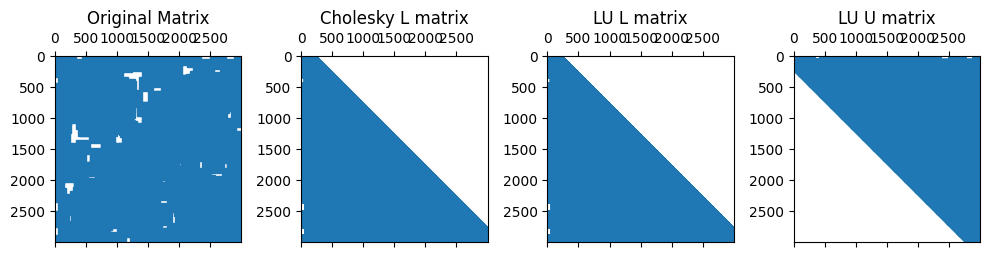

Cholesky time taken:  0.3621788024902344
LU time taken:  0.2320690155029297
Nonzero elements in original matrix:  9598
Nonzero elements in Cholesky L:  312869
Nonzero elements in LU L:  279230


In [ ]:
# Derive Cholesky Factorization
at = time.time()
factor = cholesky(A, ordering_method="natural")
bt = time.time()

# Derive LU Factorization
ct = time.time()
lu = spsplin.splu(A.tocsc(), permc_spec="NATURAL")
dt = time.time()

fig, axes = plt.subplots(1, 4, figsize=(10, 4))
axes[0].spy(A)
axes[0].set_title("Original Matrix")
axes[1].spy(factor.L())
axes[1].set_title("Cholesky L matrix")
axes[2].spy(lu.L)
axes[2].set_title("LU L matrix")
axes[3].spy(lu.U)
axes[3].set_title("LU U matrix")
plt.tight_layout()
plt.show()
print('==================================================')
print('Cholesky time taken: ', bt-at)
print('LU time taken: ', dt-ct)
print('Nonzero elements in original matrix: ', A.nnz)
print('Nonzero elements in Cholesky L: ', factor.L().nnz)
print('Nonzero elements in LU L: ', lu.L.nnz)

<ipython-input-7-b688038cc739>:3: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(A)


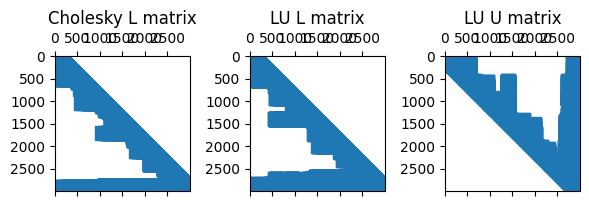

Cholesky time taken:  0.005539655685424805
LU time taken:  0.013797998428344727
Nonzero elements in original matrix:  9598
Nonzero elements in Cholesky L:  17712
Nonzero elements in LU L:  36969


In [ ]:
# Derive Cholesky Factorization
at = time.time()
factor = cholesky(A)
bt = time.time()

# Derive LU Factorization
ct = time.time()
lu = spsplin.splu(A.tocsc())
dt = time.time()

fig, axes = plt.subplots(1, 3, figsize=(6, 4))
axes[0].spy(factor.L())
axes[0].set_title("Cholesky L matrix")
axes[1].spy(lu.L)
axes[1].set_title("LU L matrix")
axes[2].spy(lu.U)
axes[2].set_title("LU U matrix")
plt.tight_layout()
plt.show()
print('==================================================')
print('Cholesky time taken: ', bt-at)
print('LU time taken: ', dt-ct)
print('Nonzero elements in original matrix: ', A.nnz)
print('Nonzero elements in Cholesky L: ', factor.L().nnz)
print('Nonzero elements in LU L: ', lu.L.nnz)

## Nested dissection algorythm

As LU and Cholesky algorythms derive factors in a pre-defined order, we can permute matrix in a way to make this algorythms produce minimal fill-in. One of approaches that works with SPD matrices is reducing to **block arrowhead structure**.

$$
PAP^\top = \begin{bmatrix} A_{\alpha\alpha} & 0 & A_{\alpha\sigma} \\ 0 & A_{\beta\beta} & A_{\beta\sigma} \\ A_{\sigma\alpha} & A_{\sigma\beta} & A_{\sigma\sigma}\end{bmatrix}
$$

After decomposition, factors will have 0-blocks intact.

Main idea is that symmetric matrix $A$ can be considered an adjacency matrix for some graph $G$. Then if we split $G$ into subgraphs $L, R, S$ in a way that there are no edges between nodes from $L$ and $R$, we can construct blocks, where node index is equal to matrix row/column index, and thus blocks $A_{LR}$ and $A_{RL}$ will be $0$.

The challenge in this approach is locating an optimal subset $S$ called **Separator** of nodes of $G$.

Here we will choose separator using Spectral Partitioning approach (you can read about it in Lecture 11)

## Task 1 (5 pts): implement matrix separation

Implement given algorythm to permute matrix into lower-arrowhead block form

In [ ]:
def block_dissection(A):
  B = A.copy()
  B.data = np.ones_like(B.data)
  G=nx.from_numpy_array(A)

  # YOUR CODE

  A = A[order, :][:, order]

  return A

In [ ]:
n = 300
k = 3
ex = np.ones(n)
A = sp.spdiags(np.vstack((2*ex,  8*ex, 2*ex)), [-1, 0, 1], n, n, 'csr')
S = np.abs(sp.random(n,n, density=(1/(k*n))).tocsr())
A = A+ S.transpose() + S

In [ ]:
B = block_dissection(A)

<ipython-input-8-e4b93569219e>:5: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.14.0.
  Laplacian = nx.laplacian_matrix(G).asfptype()


<ipython-input-12-ed0d45a698a1>:6: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(B, ordering_method="natural")


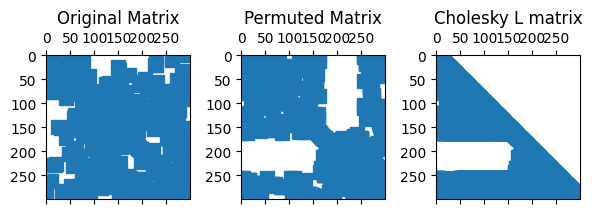

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(6, 4))
axes[0].spy(A)
axes[0].set_title("Original Matrix")
axes[1].spy(B)
axes[1].set_title("Permuted Matrix")
factor = cholesky(B, ordering_method="natural")
axes[2].spy(factor.L())
axes[2].set_title("Cholesky L matrix")
plt.tight_layout()
plt.show()

## Task 2 (5 pts): implement Nested Dissection



Now implement algorithm that will recursively permute each of $A_{iLL}$ and $A_{iRR}$ blocks to their own lower-arrowhead bock form.

Reminder: you are permuting the whole matrix, not each block separately.

Reminder: it is a good idea to move all $A_{iSS}$ blocks together on the bottom.

In [ ]:
# A - PSD matrix
# k - maximal block size
def nested_dissection(A, k=10):
  if A.shape[0] <k:
    return [i for i in range(A.shape[0])], []

  B = A.copy()
  B.data = np.ones_like(B.data)
  G=nx.from_numpy_array(A)

  # YOUR CODE


  order = np.arange(len(A))
  return   order = np.arange(len(A))

In [ ]:
n = 3000
k = 5
ex = np.ones(n)
A = sp.spdiags(np.vstack((1*ex,  3*ex, 1*ex)), [-1, 0, 1], n, n, 'csr')
S = np.abs(sp.random(n,n, density=(1/(k*n))).tocsr())
A = A + S.transpose() + S

In [ ]:
order =
B = A[order, :][:, order]

<ipython-input-33-ee1a187d7f77>:10: DeprecationWarning: `asfptype` is an internal function, and is deprecated as part of the public API. It will be removed in v1.14.0.
  Laplacian = nx.laplacian_matrix(G).asfptype()


<ipython-input-36-5e3c5b4121da>:6: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factorA = cholesky(A, ordering_method="natural")
<ipython-input-36-5e3c5b4121da>:9: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factorB = cholesky(B, ordering_method="natural")


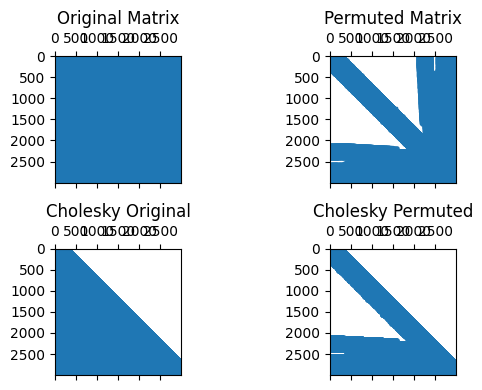

Nonzero elements in original matrix:     10198
Nonzero elements in Cholesky L:          597490
Nonzero elements in permuted Cholesky L: 151434


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes[0,0].spy(A)
axes[0,0].set_title("Original Matrix")
axes[0,1].spy(B)
axes[0,1].set_title("Permuted Matrix")
factorA = cholesky(A, ordering_method="natural")
axes[1,0].spy(factorA.L())
axes[1,0].set_title("Cholesky Original")
factorB = cholesky(B, ordering_method="natural")
axes[1,1].spy(factorB.L())
axes[1,1].set_title("Cholesky Permuted")
plt.tight_layout()
plt.show()

print('Nonzero elements in original matrix:    ', A.nnz)
print('Nonzero elements in Cholesky L:         ', factorA.L().nnz)
print('Nonzero elements in permuted Cholesky L:', factorB.L().nnz)

## Demonstration: Animation of heat distribution in a wall

Consider simulating heat distribution in a large mechanical component (e.g., a car engine block or a building wall). The thermal conduction equation is modeled using the **Heat Equation**, a PDE:

$$
\frac{\partial T}{\partial t} = \nabla \cdot (k \nabla T) + Q,
$$
where:
- $ T $: temperature,
- $ k $: thermal conductivity,
- $ Q $: heat source.

Using [Finite Element Method](https://en.wikipedia.org/wiki/Finite_element_method#:~:text=The%20finite%20element%20method%20(FEM,mass%20transport%2C%20and%20electromagnetic%20potential.) we represent continuous solid object as a set of small separate objects. Each of them transfers heat only to neighbouring pieces. Thus, if we represent temperature of all $n$ pieces in a vector $T$ we can construct $n \times n$ adjacency matrix $A$, in which each non-zero element $a_{i,j}$ represents heat conductivity between elements $i$ and $j$, and the initial equation [can be represented](https://skim.math.msstate.edu/LectureNotes/NumerPDEs_Lecture.pdf) as:
$$
AT_{t+1}=T_t
$$

To make calculations more accurate, we need to represent object with larger number $n$ of small pieces of size $1/k$. However, size of $A$ is $\mathcal{O}(k^4)$ for a 2D object and $\mathcal{O}(k^9)$ for 3D object, which may be way too large.

However, $A$ has an important feature - it is sparse, positive and symmetric. This will allow us to use sparse methods and fast Cholesky factorization for quick solution. Also, computationally-expensive computation of matrix permutation can be done only once, as adjacency matrix does not change.



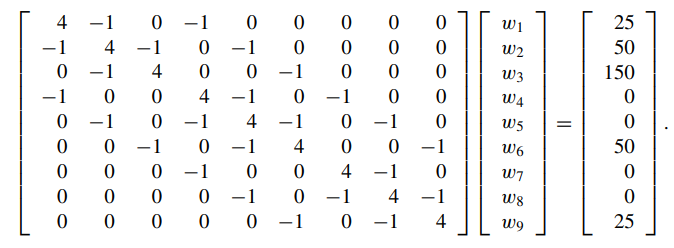

In [ ]:
def adjacency_conductivity_matrix(Nx, Ny, alpha):
    N = Nx * Ny  # Total number of nodes
    A = sp.lil_matrix((N, N))  # Initialize sparse adjacency matrix

    for i in range(Nx):
        for j in range(Ny):
            node = i * Ny + j
            if i > 0:  # Above
                neighbor = (i - 1) * Ny + j
                A[node, neighbor] = 1
            if i < Nx - 1:  # Below
                neighbor = (i + 1) * Ny + j
                A[node, neighbor] = 1
            if j > 0:  # Left
                neighbor = i * Ny + (j - 1)
                A[node, neighbor] = 1
            if j < Ny - 1:  # Right
                neighbor = i * Ny + (j + 1)
                A[node, neighbor] = 1

    I = sp.eye(Nx*Ny, format="csr")
    return (1+4*alpha)*I - alpha*A

In [ ]:
def predict_heat_distribution_homemade(A, T, Nx, Ny, n_frames):
  lr, s = nested_dissection(A, 500)
  order = lr + s
  B = A[order, :][:, order]

  cholesky_factorization = cholesky(B, ordering_method='natural')

  frames = [T.copy().reshape((Nx, Ny))]

  for _ in tqdm(range(n_frames)):
    # Solve sparse linear system for next time step
    T = cholesky_factorization.solve_A(T[order])[np.argsort(order)]
    frames.append(T.reshape((Nx, Ny)))
  return frames

In [ ]:
Nx, Ny = 3, 3                                    # Number of grid points in x and y
alpha = 0.1
T = np.array([25, 50, 150, 0, 0, 50, 0, 0, 25])  # Initial temperature distribution
A = adjacency_conductivity_matrix(Nx, Ny, alpha)
A.toarray()

array([[ 1.4, -0.1,  0. , -0.1,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.1,  1.4, -0.1,  0. , -0.1,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.1,  1.4,  0. ,  0. , -0.1,  0. ,  0. ,  0. ],
       [-0.1,  0. ,  0. ,  1.4, -0.1,  0. , -0.1,  0. ,  0. ],
       [ 0. , -0.1,  0. , -0.1,  1.4, -0.1,  0. , -0.1,  0. ],
       [ 0. ,  0. , -0.1,  0. , -0.1,  1.4,  0. ,  0. , -0.1],
       [ 0. ,  0. ,  0. , -0.1,  0. ,  0. ,  1.4, -0.1,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.1,  0. , -0.1,  1.4, -0.1],
       [ 0. ,  0. ,  0. ,  0. ,  0. , -0.1,  0. , -0.1,  1.4]])

In [ ]:
n_frames = 10
frames = predict_heat_distribution_homemade(A, T, Nx, Ny, n_frames)

<ipython-input-38-bde0fd9e0157>:6: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  cholesky_factorization = cholesky(B, ordering_method='natural')
100%|██████████| 10/10 [00:00<00:00, 21194.06it/s]


In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(frames[0], cmap='hot', interpolation='nearest')
ax.set_title("Heat Distribution")
plt.colorbar(im, ax=ax)

def update(frame):
    im.set_data(frames[frame])
    ax.set_title(f"Time Step {frame + 1}/{n_frames}")
    return [im]

ani = FuncAnimation(fig, update, frames=len(frames), interval=500, blit=True)

# Display animation as HTML5 video in Google Colab
video = ani.to_html5_video()
plt.close(fig)  # Avoid duplicate plot output
HTML(video)

In [ ]:
Nx, Ny = 200, 200          # Number of grid points in x and y
alpha = 0.1
T = 10*np.random.rand(Nx* Ny)  # Initial temperature distribution
A = adjacency_conductivity_matrix(Nx, Ny, alpha)

In [ ]:
frames = predict_heat_distribution_homemade(A, T, Nx, Ny, n_frames)

<ipython-input-46-84f03bf4c6a8>:2: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  cholesky_factorization = cholesky(A)
100%|██████████| 10/10 [00:00<00:00, 102.30it/s]


In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(frames[0], cmap='hot', interpolation='nearest')
ax.set_title("Heat Distribution")
plt.colorbar(im, ax=ax)

def update(frame):
    im.set_data(frames[frame])
    ax.set_title(f"Time Step {frame + 1}/{n_frames}")
    return [im]

ani = FuncAnimation(fig, update, frames=len(frames), interval=500)

# Display animation as HTML5 video in Google Colab
video = ani.to_html5_video()
plt.close(fig)  # Avoid duplicate plot output
HTML(video)

## **Task 3 (5 pts):**
Compare computation and memory efficiency of Cholesky using intact matrix with your implementation of Nested Dissection with built-in method.

In [ ]:
def predict_heat_distribution_naive(A, T, Nx, Ny, n_frames):
  cholesky_factorization = cholesky(A)

  frames = [T.copy().reshape((Nx, Ny))]

  for _ in tqdm(range(n_frames)):
    # Solve sparse linear system for next time step
    T = cholesky_factorization.solve_A(T, ordering_method='natural')
    frames.append(T.reshape((Nx, Ny)))
  return frames

In [ ]:
def predict_heat_distribution(A, T, Nx, Ny, n_frames):
  cholesky_factorization = cholesky(A)

  frames = [T.copy().reshape((Nx, Ny))]

  for _ in tqdm(range(n_frames)):
    # Solve sparse linear system for next time step
    T = cholesky_factorization.solve_A(T)
    frames.append(T.reshape((Nx, Ny)))
  return frames

# Clusterisation of musical notes with FFT and PCA (10 pts)

In [ ]:
import numpy as np
from scipy.io import wavfile
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

## Implement FFT via Cooley-Tukey (check lectures) (5 pts)

In [ ]:
def FFT(x):
    """
    1D Cooly-Tukey, for input of size 2**n
    """


    '''
    Replace with your own implementation
    '''

    return fft(x)

## PCA (use SVD library func) (5 pts)

In [ ]:
def calc_PCA(matrix, n_components):
    # as input: matrix (n_samples, n_features)
    # as output: matrix (n_samples, n_features)

    '''
    replace with your own func!
    '''

    from sklearn.decomposition import PCA
    a = PCA(n_components)
    return a.fit_transform(matrix)

## Read files + Utils

Link to data: https://www.dropbox.com/scl/fi/1yocyjpno1m2whrg0z4mb/wav.zip?rlkey=a5lt21h0fguqlspsozydhnw0p&st=88vtz01x&dl=0

In [ ]:
def process_audio(filename):
    samplerate, data = wavfile.read(f'./{filename}.wav')
    if len(data.shape) > 1:
        # convert to mono
        data = data[:, 0]

    data_splitted = []

    w_size = 2048
    for indent in [0, 512, 1024, 1024 + 512]:
        data_i = data[indent:]
        data_i = data_i[:data_i.shape[0] - data_i.shape[0] % w_size]
        n_splits = data_i.shape[0] // w_size
        # print(data.shape)
        data_splitted.append(np.split(data_i, n_splits))

    data_splitted = np.concatenate(data_splitted)


    a = FFT(data_splitted)
    a = a / np.linalg.norm(a, axis=1).reshape(-1, 1)
    return a, [filename] * a.shape[0]

In [ ]:
chunks, labels = [], []

for fl in ['a1', 'b1', 'c1', 'e1', 'f1', 'g1', 'a1s', 'c1s', 'd1s', 'f1s', 'g1s']:
    z, x = process_audio(fl)
    chunks.append(z)
    labels.append(x)



In [ ]:
labels_concat = []
for l in labels:
    labels_concat += l

In [ ]:
chunks_np = np.abs(np.concatenate(chunks))

In [ ]:
chunks_fitted = calc_PCA(chunks_np, 4)

## Visualisation

In [ ]:
colors = {
    'a1': 'red',
    'a1s': 'pink',
    'b1': 'green',
    'c1': 'blue',
    'c1s': 'olive',
    'd1s': 'purple',
    'e1': 'cyan',
    'f1': 'orange',
    'f1s': 'black',
    'g1': 'yellow',
    'g1s': 'blueviolet',

}
color_labels = [colors[d] for d in labels_concat]

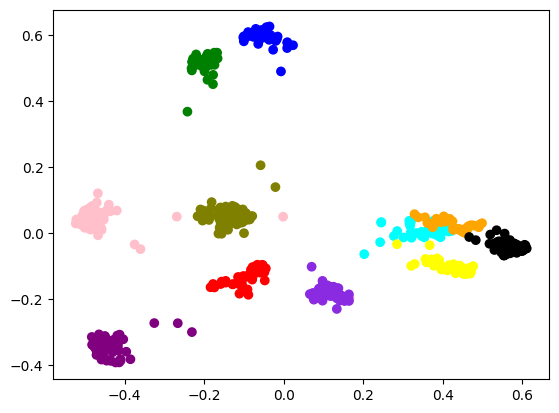

In [ ]:
plt.scatter(chunks_fitted[:, 0], chunks_fitted[:, 3], color=color_labels)

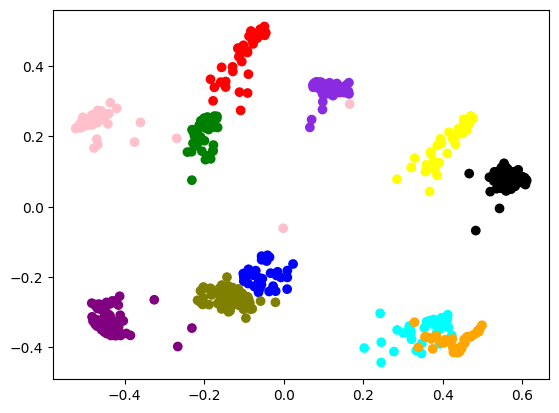

In [ ]:
plt.scatter(chunks_fitted[:, 0], chunks_fitted[:, 2], color=color_labels)